# Una questione di qualità: l’uso dei connettivi nelle produzioni scritte di studenti italofoni

This notebook contains the analysis for the presentation "Una questione di qualità: l’uso dei connettivi nelle produzioni scritte di studenti italofoni", discussed at Universität Basel, 13-14 November.

The research questions are: 

1. Does the use of connectives (in terms of number of tokens, RTTR, sophistication and range) change as a function of training in writing?
2. Does number of connectives, variety (RTTR) or sophistication of connectives used correlate with holistic judgements of textual coherence?
3. Does accuracy in using connectives correlates with holistic judgements of textual coherence? If so, which are the most 'problematic' connectives? Which are the most 'problematic' discourse relations?

In this notebook we will report the procedures followed to answer RQ2 and RQ3.

## Config and connective data pre-processing

in this section we're preparing the connective data for the analysis. \
We will make use of three sources of data: 

a. an export of all connectives in the ITACA annotated files, from the ANNIS query interface\
b. a manually compiled dictionary that normalises connective forms in their citation forms and associates the frequency of occurrences of these citation forms and variants in a reference corpus for Italian (CORIS, Rossini-Favretti et al. 2005)\
d. LICO (Lexicon of Italian Connectives) extended\

In [1]:
# Check locale settings

Sys.getlocale()
l10n_info()

[1] "C"

$MBCS
[1] FALSE

$`UTF-8`
[1] FALSE

$`Latin-1`
[1] FALSE

$codeset
[1] "US-ASCII"

In [2]:
# If your locale is 'C' and codeset is different than 'UTF-8'
# you maybe want to set your locale to be able to handle special characters.

Sys.setlocale("LC_CTYPE", "en_US.UTF-8")

[1] "en_US.UTF-8"

In [3]:
# load libraries

library(tidyverse)
library(readxl)
library(paletteer)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


### A. The connective annotations
The data has been downloaded from https://all4ling.eurac.edu/annis4/, choosing the itaca-v1.0-b10 corpus

The following query has been used: `ConnProblematico = /.*/ @* annotated = "TRUE"`
This query searches for all connectives (both 'problematic' and not) in the subset of annotated files.

The query results are exported using the 'CSVExporter'.
The data is nevertheless made available in the repo to ensure straightforward reproducibility of the results.

In [4]:
# load the connective data

df <- read.table("source/annis-export16169579263733649896.csv",
                 sep = "\t", header = TRUE, fill = TRUE,
                 quote = "", comment.char = "")

# check whether the number of rows matches
# the number of hits in the query interface:
nrow(df)

[1] 17365

In [5]:
# prep the connective data

data <- df %>%
  # a) Select relevant columns
  select(text_id = X1_id,
         span = X1_span,
         conn_prob = X1_anno_webanno..ConnProblematico) %>%
  # b) Extract text ID using regex
  mutate(
    text_id = str_extract(text_id, "[A-Z0-9_]+(?=#)"),
    span = tolower(str_replace_all(span, "\'", "")),
    conn_prob = tolower(conn_prob) == "true", # Convert to logical
  )

print(c("Total number of connectives:", nrow(data)))
print(c("Average number of connectives per text:",
        nrow(data) / length(unique(data$text_id))))

[1] "Total number of connectives:" "17365"                       
[1] "Average number of connectives per text:"
[2] "44.7551546391753"                       


In [6]:
# use this output as input for the dictionary of frequencies in CORIS
conn <- unique(data$span)
conn

# BAD PRACTICE: I simply copy-pasted this output in an excel file
# to go on with annotations.

[1] "a causa di"                   "e"                           
  [3] "come"                         "per"                         
  [5] "nonostante"                   "senza"                       
  [7] "se"                           "perché"                      
  [9] "anche"                        "a causa della"               
 [11] "inoltre"                      "in quanto"                   
 [13] "in conclusione"               "ma"                          
 [15] "perchè"                       "cosi"                        
 [17] "oppure"                       "solo"                        
 [19] "comunque"                     "di conseguenza"              
 [21] "quando"                       "infatti"                     
 [23] "in quando"                    "perche"                      
 [25] "per tanto"                    "pertanto"                    
 [27] "da una parte"                 "quindi"                      
 [29] "o"                            "pero"                        
 [31] "per quanto"                   "prima di"                    
 [33] "ad esempio"                   "grazie al"                   
 [35] "allora"                       "oltre a"                     
 [37] "in più"                       "con questo"                  
 [39] "anzi"                         "mentre"                      
 [41] "dato che"                     "invece che"                  
 [43] "però"                         "invece"                      
 [45] "ed"                           "dunque"                      
 [47] "in modo da"                   "prima"                       
 [49] "ovvero"                       "precedentemente"             
 [51] "al posto di"                  "né"                          
 [53] "al contrario"                 "per questo motivo"           
 [55] "in ogni caso"                 "anche se"                    
 [57] "poi"                          "per esempio"                 
 [59] "così"                         "dopo"                        
 [61] "al fine di"                   "cioè"                        
 [63] "che"                          "nel caso in cui"             
 [65] "per il resto"                 "ossia"                       
 [67] "in primis"                    "per via della"               
 [69] "per via delle"                "per via dell"                
 [71] "tuttavia"                     "sia"                         
 [73] "nonostante ciò"               "affinché"                    
 [75] "in modo tale da"              "per questo"                  
 [77] "altrimenti"                   "m a"                         
 [79] "per concludere"               "senza che"                   
 [81] "per tale motivo"              "poiché"                      
 [83] "fatto sta che"                "piuttosto che"               
 [85] "tra l altro"                  "per cui"                     
 [87] "con ciò"                      "o meglio"                    
 [89] "in realtà"                    "dal momento che"             
 [91] "ugualmente"                   "in seguito"                  
 [93] "a causa dei"                  "per via dei"                 
 [95] "solamente"                    "perciò"                      
 [97] "alla fine"                    "laddove"                     
 [99] "pure"                         "così che"                    
[101] "a meno che"                   "insomma"                     
[103] "a causa del"                  "intanto"                     
[105] "in base alle"                 "da un lato"                  
[107] "visto che"                    "in poche parole"             
[109] "prima della"                  "in base a"                   
[111] "piuttosto"                    "al massimo"                  
[113] "prima che"                    "a causa delle"               
[115] "seppur"                       "peraltro"                    
[117] "cosi da"                      "cosi che"           

### B. The sophistication dictionary
Starting from the unique list of connectives used in the annotated corpus, the authors (Bienati, Zanasi) have:

1. reconducted the forms occuring as annotations in the corpus to the citation lemma (es. 'a causa delle' > 'a.causa.d')
2. checked if the form was or not listed in the LICO
    * Note: if the form was not in the LICO and annotated as problematic, the target hypothesis was reported as the citation lemma.
3. searched for the citation lemma and all its variants (as found in the LICO) in CORIS and reported both the query used for the extraction and the number of matches to the query.

In [7]:
# load the sophistication dictionary
# and perform some cleaning (column selection, strip of quotes on 'span' column)

dict <- read_excel("source/pulizia_connettivi.xlsx", sheet = "foglio_di_lavoro")
dict <- dict %>%
  select(span = forma_attestata,
         lemma = lemma_di_citazione,
         coris_freq = frequenza_di_occorrenza,
         demauro_use = marca_uso
  ) %>%
  mutate(span = str_remove_all(span, "^'|'$"))

head(dict)

span,lemma,coris_freq,demauro_use
<chr>,<chr>,<dbl>,<chr>
a causa degli,a.causa.d,10880,CO
a causa dei,a.causa.d,10880,CO
a causa del,a.causa.d,10880,CO
a causa dell,a.causa.d,10880,CO
a causa della,a.causa.d,10880,CO
a causa delle,a.causa.d,10880,CO


### C. LICO (Lexicon of Italian Connectives)

To include information also on the sense of the connectives, we rely on LICO (Feltracco et al. 2016).
The version we use here has been extended since some connective senses were missing entirely in the original one.

In [8]:
# load the data
lico <- read.table("source/it_connectives_spacedelim_extended.txt",
                   sep = "\t", header = FALSE, quote = "",
                   col.names = c("lemma", "sense", "pos"))

# some processing:

replacements <- c("\'" = "", # no apostrophes
                  " " = ".", # no spaces (repl with .)
                  "(.*?)\\.\\.\\..*" = "\\1")
                  # just first part of correlative constructs (es. sia...sia)

lico <- lico %>%
  # apply the replacements to the lemmas
  mutate(lemma = str_replace_all(lemma, replacements),
         # keep just one sense per connective (the first)
         sense = str_split_i(sense, "/", 1)) %>%
  # ensure that after the replacements there are only unique tokens
  distinct(lemma, .keep_all = TRUE) %>%
  # create three columns from the senses stored in LICO
  separate_wider_delim(sense, delim = ":",
                       names = c("sense", "category", "subcategory"),
                       too_few = "align_start")

# check
nrow(lico)

[1] 343

In [9]:
head(lico)

lemma,sense,category,subcategory,pos
<chr>,<chr>,<chr>,<chr>,<chr>
a.causa.d,CONTINGENCY,Cause,Reason,prep
a.causa.degli,CONTINGENCY,Cause,Reason,prep
a.causa.dei,CONTINGENCY,Cause,Reason,prep
a.causa.del,CONTINGENCY,Cause,Reason,prep
a.causa.dell,CONTINGENCY,Cause,Reason,prep
a.causa.della,CONTINGENCY,Cause,Reason,prep


In [10]:
# join info from the three sources

data <- data %>%
  left_join(dict, by = "span") %>%
  left_join(lico, by = "lemma")

print(c("Total number of connectives:", nrow(data)))
print(c("Average number of connectives per text:",
        nrow(data) / length(unique(data$text_id))))

[1] "Total number of connectives:" "17365"                       
[1] "Average number of connectives per text:"
[2] "44.7551546391753"                       


In [11]:
head(data)

,text_id,span,conn_prob,lemma,coris_freq,demauro_use,sense,category,subcategory,pos
,<chr>,<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,AC20PA_COC16A,a causa di,FALSE,a.causa.d,10880,CO,CONTINGENCY,Cause,Reason,prep
2,AC20PA_COC16A,e,FALSE,e,3684940,FO,EXPANSION,Conjunction,NA,cco
3,AC20PA_COC16A,come,FALSE,come,537580,FO,TEMPORAL,Synchronous,NA,csu
4,AC20PA_COC16A,per,FALSE,per,303008,FO,CONTINGENCY,Cause,Reason,prep
5,AC20PA_COC16A,come,FALSE,come,537580,FO,TEMPORAL,Synchronous,NA,csu
6,AC20PA_COC16A,nonostante,FALSE,nonostante,19877,FO,COMPARISON,Concession,Arg1-as-denier,csu


## Measure computation

From the joined sources we derive:

i. ABSOLUTE NUMBERS (FLUENCY)
* number of connectives per text (connective tokens)
* number of unique connectives per text (connective types)
* list of unique connectives and relative counts

ii. VARIETY/UNPREDICTABILITY (COMPLEXITY)
* root type-token ratio
* entropy
* normalized entropy

iii. SOPHISTICATION
* mean frequency of occurrence in a ref. corpus of connectives present in a text, log-transformed.

iii. ACCURACY
* number of connectives that were annotated as 'problematic'
* accuracy, calculated as the ratio of problematic connectives on the total number of connectives

In [12]:
# prepare the data

calculate_entropy <- function(counts) {
  probs <- counts / sum(counts)  # Calculate probabilities
  entropy <- -sum(probs * log(probs))  # Entropy formula
  return(entropy)
}

meas_df <- data %>%
# Group by text_id and calculate metrics
  group_by(text_id) %>%
  summarise(
    # absolute numbers (types and tokens)
    num_connectives = n(),
    types = list(unique(span)),
    connective_counts = list(table(span)),
    num_types = length(unique(span)),
    # variety
    rttr = num_types / sqrt(num_connectives),
    # unpredictability
    entropy = map_dbl(connective_counts, calculate_entropy),
    norm_entropy = entropy / log(num_types),
    # sophistication
    sophistication = log10(mean(coris_freq)),
    # accuracy
    problematic_connectives = sum(conn_prob),
    accuracy = 1 - (problematic_connectives / num_connectives)
  ) %>%
  ungroup()

## The dependent variable: the holistic ratings

Ratings of textual coherence, downloaded from the ITACA Gitlab repo.
In the repo a table containing al 44 ratings per text given by 2 expert raters are stored. For this analysis we implement the not-yet-published procedure to derive some holistic scores from the analytical ratings collected. 

The procedure is as follows: after having performed a EFA and a CFA, three dimensions emerged as particularly relevant: 
* argumentation
* comprehensibility
* segmentation

The 5 items that loaded the most on these dimensions were chosen as representatives of the dimensions.
Furthermore each of these items underwent a procedure assessing whether the assumption of the Rasch model would hold.

Then, the scores obtained by the text on each item are summed and transformed into a logit scale (1-10).

Since we have, for each text, 2 ratings for each item, the final scores were obtained by taking the average of the two logit summed scores.

The procedure is reported below.

In [13]:
# load the ratings

rat <- read.table("output/ratings.csv",
                  sep = ",", header = TRUE)
nrow(rat)

[1] 1298

In [14]:
# keep just the items that load on specific dimensions of coherence

arg <- c("likert_024", "likert_026", "likert_031", "likert_022", "likert_034")
compr <- c("likert_037", "likert_017", "likert_043", "likert_040", "likert_020")
segm <- c("likert_013", "likert_012", "likert_005", "likert_006", "likert_007")

hol_rat <- rat %>%
  select(rater_id, text_id,
         all_of(arg),
         all_of(compr),
         all_of(segm)) %>%
  # compute the sum across all items per dimension
  mutate(sum_arg = rowSums(across(all_of(arg)))) %>%
  mutate(sum_compr = rowSums(across(all_of(compr)))) %>%
  mutate(sum_segm = rowSums(across(all_of(segm)))) %>%
  # apply logit scale
  mutate(sum_arg_logit = case_match(sum_arg, 0 ~ 1,
                                    1 ~ 1.926,
                                    2 ~ 2.782,
                                    3 ~ 3.351,
                                    4 ~ 3.800,
                                    5 ~ 4.189,
                                    6 ~ 4.547,
                                    7 ~ 4.896,
                                    8 ~ 5.252,
                                    9 ~ 5.634,
                                    10 ~ 6.061,
                                    11 ~ 6.555,
                                    12 ~ 7.143,
                                    13 ~ 7.875,
                                    14 ~ 8.902,
                                    15 ~ 10)) %>%
  mutate(sum_compr_logit = case_match(sum_compr, 0 ~ 1,
                                      1 ~ 2.042,
                                      2 ~ 3.003,
                                      3 ~ 3.632,
                                      4 ~ 4.125,
                                      5 ~ 4.544,
                                      6 ~ 4.921,
                                      7 ~ 5.276,
                                      8 ~ 5.624,
                                      9 ~ 5.980,
                                      10 ~ 6.359,
                                      11 ~ 6.783,
                                      12 ~ 7.285,
                                      13 ~ 7.933,
                                      14 ~ 8.925,
                                      15 ~ 10)) %>%
  mutate(sum_segm_logit = case_match(sum_segm, 0 ~ 1,
                                     1 ~ 1.918,
                                     2 ~ 2.773,
                                     3 ~ 3.362,
                                     4 ~ 3.839,
                                     5 ~ 4.250,
                                     6 ~ 4.618,
                                     7 ~ 4.959,
                                     8 ~ 5.288,
                                     9 ~ 5.621,
                                     10 ~ 5.975,
                                     11 ~ 6.377,
                                     12 ~ 6.870,
                                     13 ~ 7.558,
                                     14 ~ 8.722,
                                     15 ~ 10))


In [15]:
# Define dimensions to analyze
dimensions <- c("arg", "compr", "segm")

# Function to calculate summary statistics in long format
calculate_summary_stats <- function(data, dimension) {
  data %>%
    group_by(text_id) %>%
    summarise(
      mean = mean(!!sym(paste0("sum_", dimension, "_logit"))),
      sd = sd(!!sym(paste0("sum_", dimension, "_logit"))),
      dimension = dimension,
      .groups = "drop"
    )
}

# Calculate rater information separately (will be the same for all dimensions)
rater_info <- hol_rat %>%
  group_by(text_id) %>%
  summarise(
    raters = toString(unique(rater_id)),
    n = n(),
    .groups = "drop"
  )

# Calculate summaries for all dimensions and combine
summary_hol_rat <- dimensions %>%
  map_dfr(~calculate_summary_stats(hol_rat, .)) %>%
  left_join(rater_info, by = "text_id")

# Clean and organize the final dataset
summary_hol_rat <- summary_hol_rat %>%
  mutate(raters = case_when(
    raters == "VeC, FoL, PiA, DeR, BoO, CaE" ~ "FoL, VeC, PiA, DeR, BoO, CaE",
    raters == "VeC, PiA, FoL, BoO, DeR, CaE" ~ "FoL, VeC, PiA, DeR, BoO, CaE",
    raters == "VeC, PiA" ~ "PiA, VeC",
    raters == "FoL, BoO" ~ "BoO, FoL",
    raters == "VeC, BoO" ~ "BoO, VeC",
    raters == "BoO, CaE" ~ "CaE, BoO",
    raters == "VeC, CaE" ~ "CaE, VeC",
    raters == "CaE, DeR" ~ "DeR, CaE",
    raters == "CaE, FoL" ~ "FoL, CaE",
    raters == "BoO, PiA" ~ "PiA, BoO",
    raters == "FoL, PiA" ~ "PiA, FoL",
    raters == "DeR, VeC" ~ "VeC, DeR",
    TRUE ~ raters
  )) %>%
  relocate(c(text_id, dimension, raters, n, mean, sd))

## Analysis

The analysis consists in a correlation study between the independent variables (number of connectives, variety, sophistication and accuracy) and the dependent variables (the holistic ratings).

For this purpose we first visualize the results and proceed only if the data seem to follow a linear (pearson) or monotonic (spearman) trend.

In [16]:
# we first merge the dataset
# to have both dependent and independent variables together

merged_df <- left_join(meas_df, summary_hol_rat, by = "text_id")

In [17]:
# function for plotting

plot_metric <- function(data,
                        x_var,
                        y_var,
                        facet,
                        point_alpha = 0.5,
                        plot_width = 15,
                        plot_height = 6,
                        add_smoothing = FALSE,
                        add_facet = TRUE) {
  # Set plot dimensions
  options(repr.plot.width = plot_width, repr.plot.height = plot_height)
  # Create base plot
  p <- ggplot(data, aes(x = .data[[x_var]], y = .data[[y_var]])) +
    geom_point(alpha = point_alpha) +
    theme_bw(base_size = 14)
  # Add smoothing line if requested
  if (add_smoothing) {
    p <- p + geom_smooth(method = "lm")
  }
  if (add_facet) {
    p <- p + facet_wrap(as.formula(paste("~", facet))) +
      theme(strip.text.x = element_text(size = 14))
  }
  return(p)
}


### RQ2

From these plots we can observe that there seems to be no correlation between the number of connectives and the holistic ratings given by the expert raters on the argumentation, comprehensibility and segmentation dimensions of coherence.

How to read the plots: on the x axis, there is the independent variable (number of connectives, rttr, and sophistication). On the y axis the dependent variable, i.e., the mean of the summed logit scores for the three dimensions: argumentation, comprehensibility and segmentation.

Since there are no striking differences between dimensions, I will now just focus on comprehensibility, since it was the dimension that contained an item specific to connectives "L'uso dei connettivi e delle anafore è funzionale alla coesione del testo".

These plots show a much weaker or possibly no clear correlation between number, variety or sophistication of connectives and comprehensibility scores. 
Points are scattered with no strong directional pattern and the spread seems more uniform across different numbers of connectives (e.g., a text having few or many connectives can score both high or low in comprehensibility scores).

This suggests that the mere quantity of connectives doesn't strongly predict text comprehensibility. Neither do variety (rttr) and sophistication (mean frequency of occurrence in a ref. corpus).

#### Number of connectives
Texts can be highly comprehensible (scoring 8-10) with both few or many connectives. Similarly, texts can be difficult to comprehend regardless of how many connectives they contain.

#### Variety
The same is true for variety: texts can be rated high on comprehensibility both when they repeat the same connectives over and over and when they use different ones. However, texts very low in comprehensibility do generally show also low rttr scores (see the dots in the bottom left corner of the plot and the empty space in the bottom right corner).

#### Sophistication
Furthermore, texts rated high on comprehensibility show both profiles: high sophistication (lower mean frequency) and low sophistication (higher mean frequency). Instead, texts which scored (very) low on comprehensibility are characterized by a low sophistication, as indicated by the little cluster of texts at the bottom right of the plot.

All this implies that it's not just the number of connectives that matters for comprehension, but likely something else, like their quality and appropriate usage (RQ3). Simply adding more connectives doesn't automatically make text more comprehensible for an expert reader assessing the text holistically. With respect to variety and sophistication, instead, it seems that higher rated texts have more multi-faceted profiles (i.e., the high score on comprehensibility is multifactorial and does not (uniquely) depend on these two characteristics). However, low holistic scores pair well with low variety and low sophistication, indicating that profiles of low-scored essays might be more homogeneous/uniform and they are easier to detect.

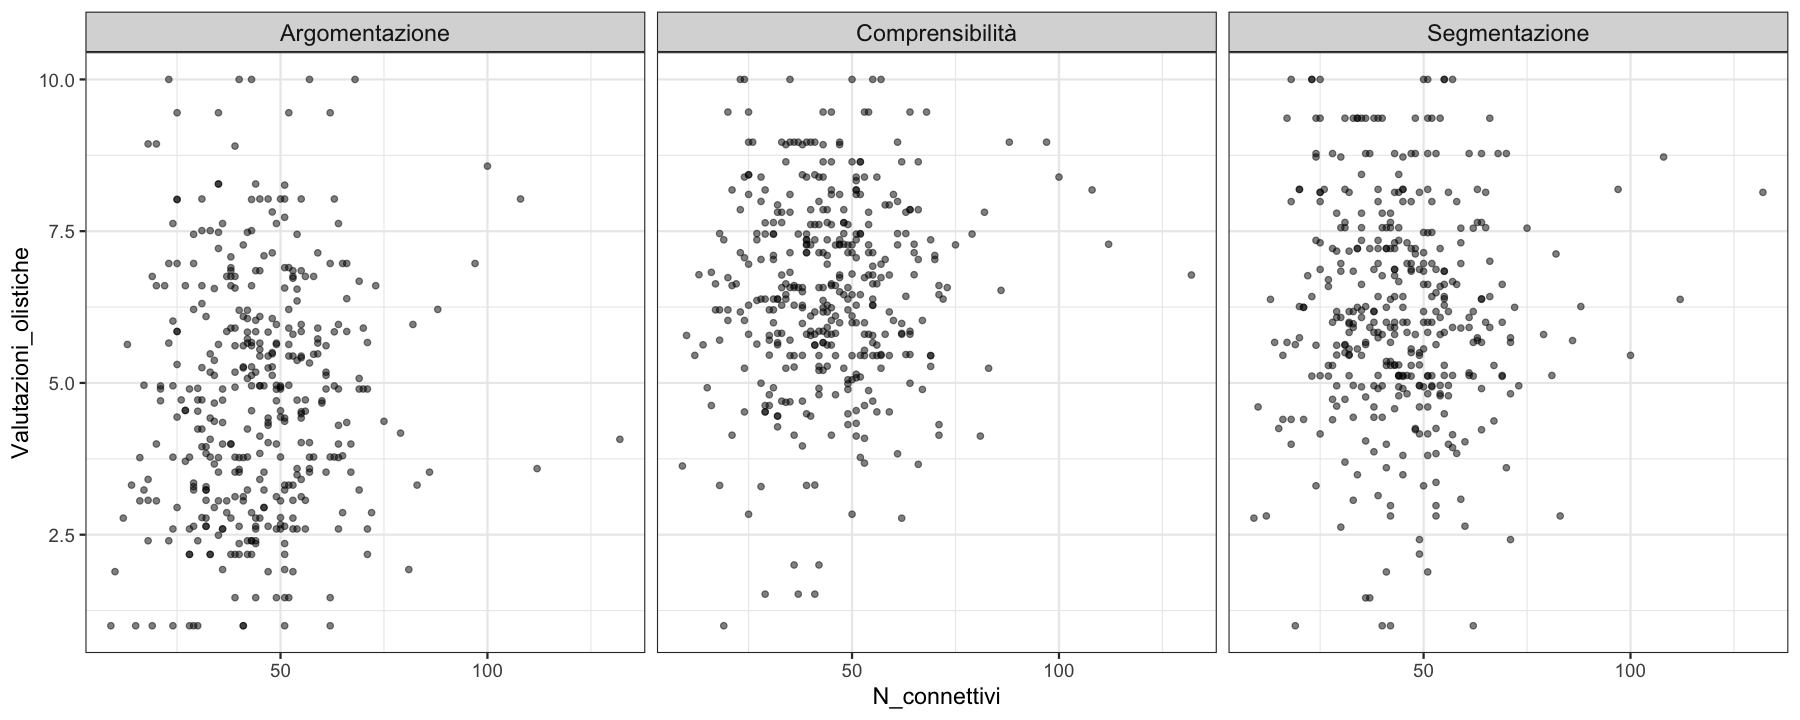

In [18]:
# printing and saving plots

plot_df <- merged_df %>%
  mutate(dimension = factor(dimension,
                            labels = c("Argomentazione",
                                       "Comprensibilità",
                                       "Segmentazione"))) %>%
  rename(
    N_connettivi = num_connectives,
    RTTR = rttr,
    Ricercatezza = sophistication,
    Valutazioni_olistiche = mean
  )

metrics <- c("N_connettivi",
             "RTTR",
             "Ricercatezza")


print(plot_metric(plot_df, "N_connettivi", "Valutazioni_olistiche",
                  facet = "dimension"))

for (metric in metrics) {
  p <- plot_metric(plot_df, metric, "Valutazioni_olistiche",
                   facet = "dimension")
  filename <- paste0("figures/", metric, "_plot.png")
  ggsave(filename, p, device = "png", create.dir = TRUE,
         width = 15, height = 6, dpi = 600, bg = "transparent")
}

In [19]:
colnames(plot_df)

[1] "text_id"                 "N_connettivi"           
 [3] "types"                   "connective_counts"      
 [5] "num_types"               "RTTR"                   
 [7] "entropy"                 "norm_entropy"           
 [9] "Ricercatezza"            "problematic_connectives"
[11] "accuracy"                "dimension"              
[13] "raters"                  "n"                      
[15] "Valutazioni_olistiche"   "sd"

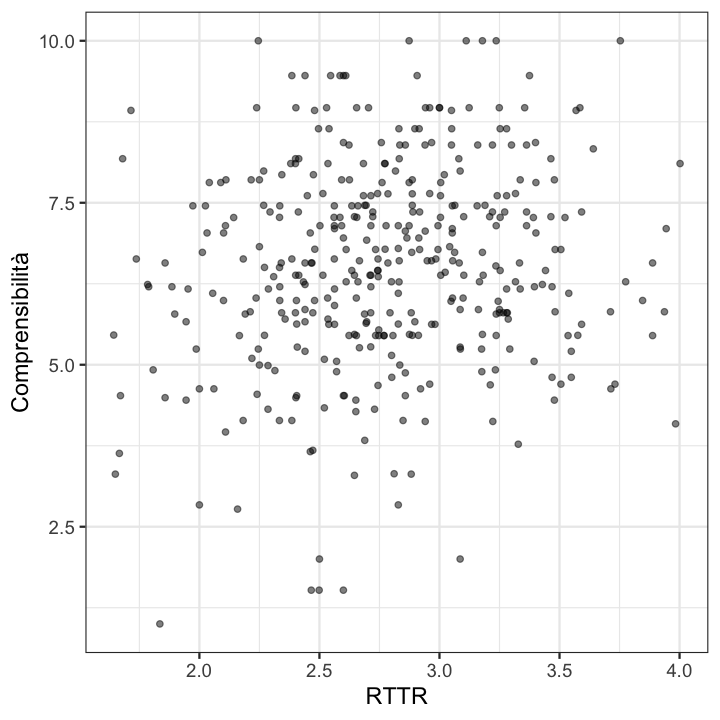

In [20]:
plot_df_compr <- plot_df %>%
  filter(dimension == "Comprensibilità") %>%
  rename(Comprensibilità = Valutazioni_olistiche,
         Accuratezza = accuracy)

print(plot_metric(plot_df_compr,
                  "RTTR", "Comprensibilità",
                  add_facet = FALSE,
                  plot_height = 6, plot_width = 6))

for (metric in metrics) {
  p1 <- plot_metric(plot_df_compr,
                    metric, "Comprensibilità",
                    add_facet = FALSE,
                    plot_height = 7, plot_width = 7)
  filename <- paste0("figures/", metric, "_plot_compr.png")
  ggsave(filename, p1, device = "png", create.dir = TRUE,
         width = 6, height = 6, dpi = 600, bg = "transparent")
}

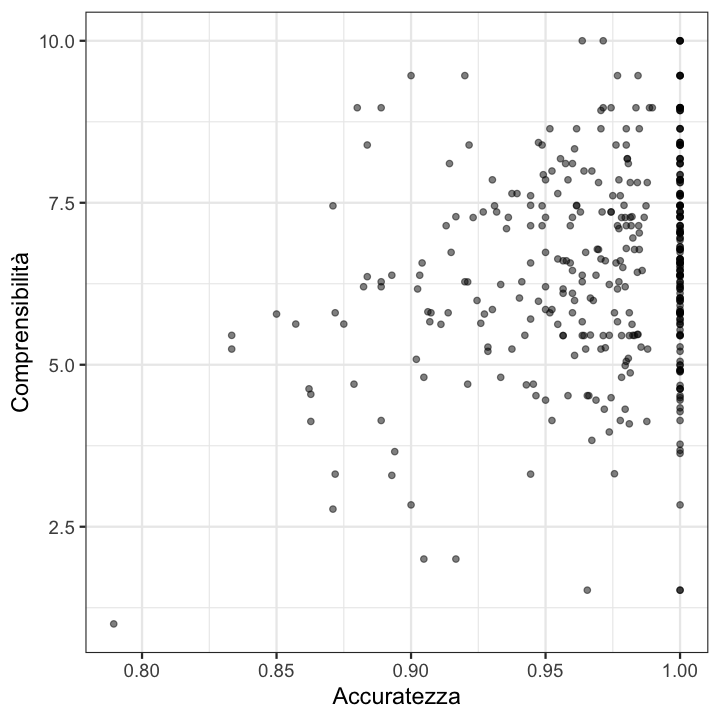

In [21]:
p2 <- plot_df_compr %>%
  #filter(Accuratezza < 1) %>%
  plot_metric(., "Accuratezza", "Comprensibilità",
              add_facet = FALSE,
              #add_smoothing = TRUE,
              plot_height = 6, plot_width = 6)
p2

ggsave("figures/Accuratezza_plot_compr.png", p2,
       device = "png", create.dir = TRUE,
       width = 6, height = 6, dpi = 600, bg = "transparent")

In [22]:
result <- merged_df %>%
  group_by(dimension) %>%
  summarize(
    s_correlation = cor(accuracy, mean, method = "spearman"),
    s_p_value = cor.test(accuracy, mean,
                         method = "spearman", exact = FALSE)$p.value,
    p_correlation = cor(accuracy, mean, method = "pearson"),
    p_p_value = cor.test(accuracy, mean,
                         method = "pearson")$p.value
  )

result

dimension,s_correlation,s_p_value,p_correlation,p_p_value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
arg,0.06348537,0.212125880,0.1261833,1.286612e-02
compr,0.16877007,0.000844958,0.2322745,3.765794e-06
segm,0.15170508,0.002735818,0.2185647,1.399328e-05


### RQ3: Error rate per connective and per connective sense

In [28]:
head(data)

,text_id,span,conn_prob,lemma,coris_freq,demauro_use,sense,category,subcategory,pos
,<chr>,<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,AC20PA_COC16A,a causa di,FALSE,a.causa.d,10880,CO,CONTINGENCY,Cause,Reason,prep
2,AC20PA_COC16A,e,FALSE,e,3684940,FO,EXPANSION,Conjunction,NA,cco
3,AC20PA_COC16A,come,FALSE,come,537580,FO,TEMPORAL,Synchronous,NA,csu
4,AC20PA_COC16A,per,FALSE,per,303008,FO,CONTINGENCY,Cause,Reason,prep
5,AC20PA_COC16A,come,FALSE,come,537580,FO,TEMPORAL,Synchronous,NA,csu
6,AC20PA_COC16A,nonostante,FALSE,nonostante,19877,FO,COMPARISON,Concession,Arg1-as-denier,csu


In [ ]:
err_df <- data %>%
  group_by(lemma) %>%
  summarize(num_lemma = n(),
            probl_lemma = sum(conn_prob),
            accuracy_lemma = 1 - (probl_lemma / num_lemma),
            coris_freq = mean(coris_freq)
  ) %>%
  ungroup

nrow(err_df)

[1] 182

In [24]:
head(err_df)

lemma,num_lemma,probl_lemma,accuracy_lemma,coris_freq
<chr>,<int>,<int>,<dbl>,<dbl>
a.causa.d,125,4,0.968,10880
a.condizione.che,2,0,1.000,1284
a.dire.il.vero,1,0,1.000,1237
a.dire.la.verità,1,0,1.000,3453
a.meno.che,10,0,1.000,6528
a.parte.che,1,1,0.000,193


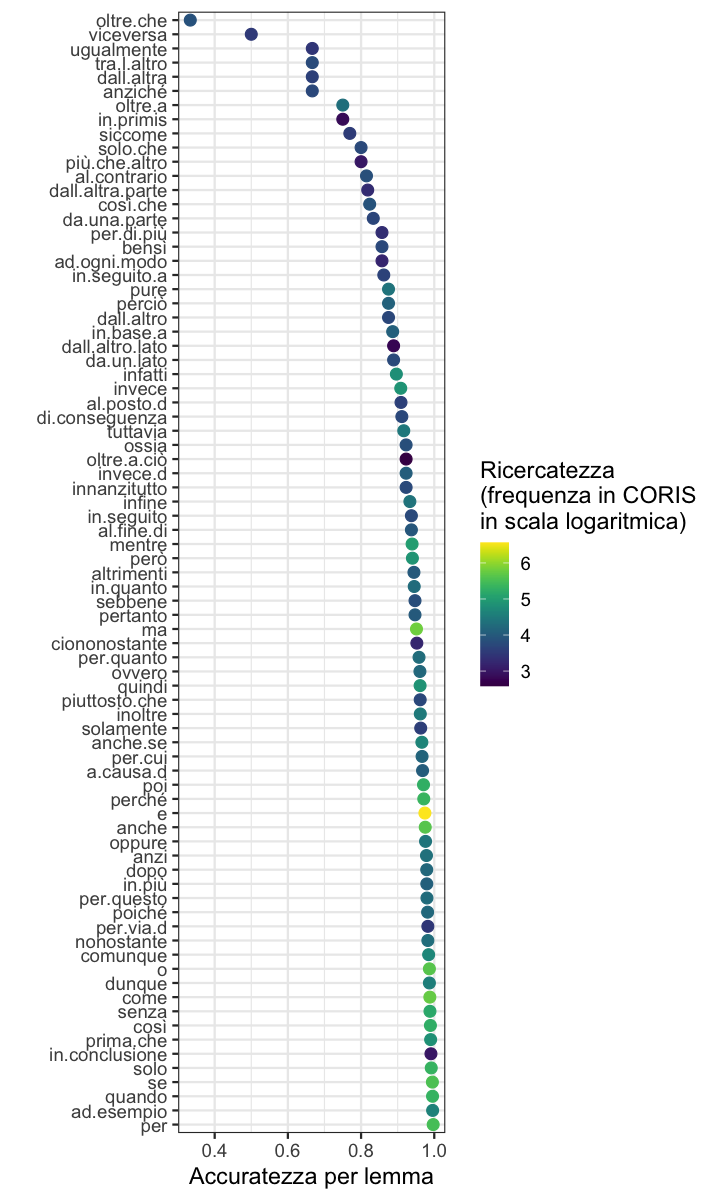

In [25]:
options(repr.plot.width = 6, repr.plot.height = 10)

lemma_acc <- err_df %>%
  filter(accuracy_lemma < 1 & accuracy_lemma > 0) %>%
  ggplot(aes(y = reorder(lemma, -accuracy_lemma),
             x = accuracy_lemma,
             colour = log10(coris_freq))) +
  geom_point(size = 3) +
  ylab("") +
  xlab("Accuratezza per lemma") +
  scale_color_paletteer_c("viridis::viridis",
                          name = "Ricercatezza\n(frequenza in CORIS\nin scala logaritmica)") +
  theme_bw(base_size = 14) +
  theme(legend.position = "right")

lemma_acc

ggsave("figures/accuracy_lemma.png", lemma_acc,
       device = "png", create.dir = TRUE,
       width = 6, height = 10, dpi = 600, bg = "transparent")

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


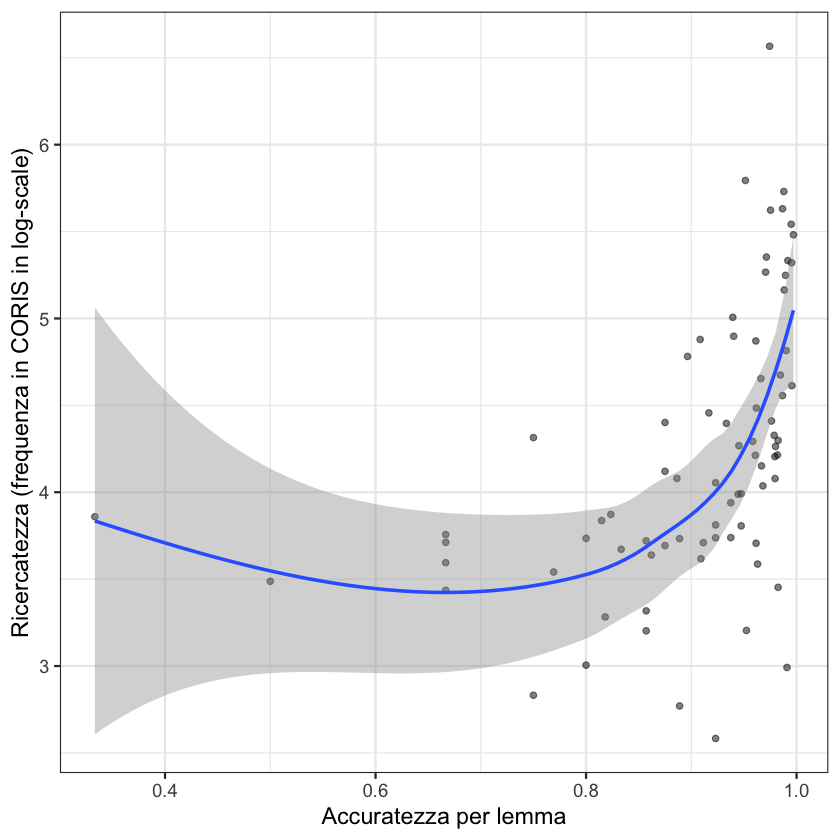

In [26]:
options(repr.plot.width = 7, repr.plot.height = 7)

acc_soph <- err_df %>%
  filter(accuracy_lemma < 1 & accuracy_lemma > 0) %>%
  ggplot(aes(x = accuracy_lemma, y = log10(coris_freq))) +
  geom_point(alpha = 0.5) +
  geom_smooth() +
  xlab("Accuratezza per lemma") +
  ylab("Ricercatezza (frequenza in CORIS in log-scale)") +
  theme_bw(base_size = 14)

acc_soph

ggsave("figures/accuracy_soph.png", acc_soph,
       device = "png", create.dir = TRUE,
       width = 6, height = 6, dpi = 600, bg = "transparent")


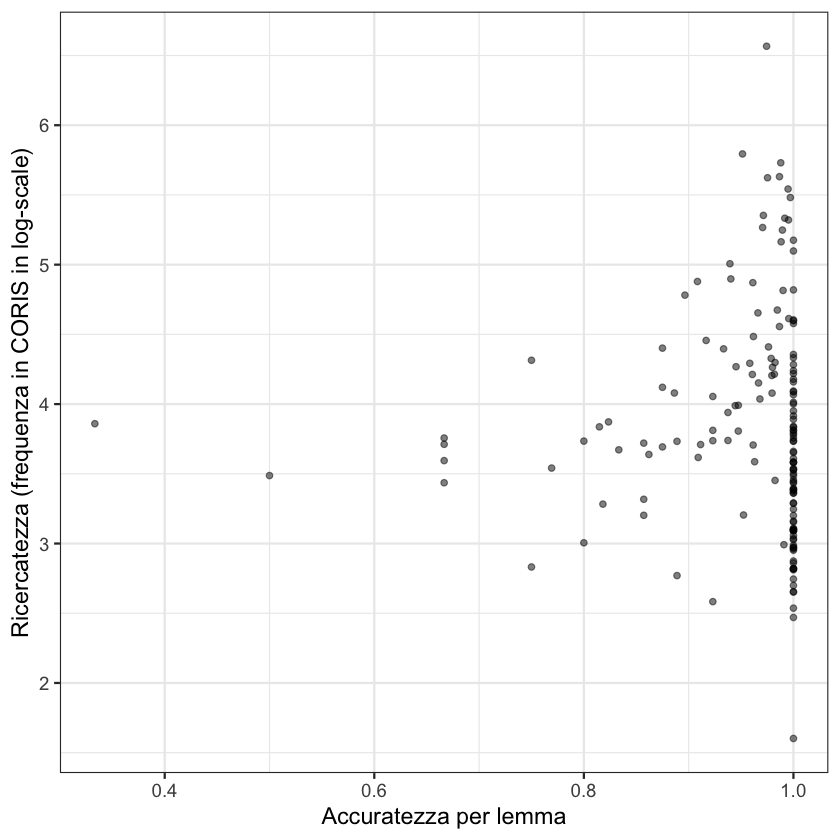

In [ ]:
options(repr.plot.width = 7, repr.plot.height = 7)

acc_soph_all <- err_df %>%
  filter(accuracy_lemma > 0) %>%
  ggplot(aes(x = accuracy_lemma, y = log10(coris_freq))) +
  geom_point(alpha = 0.5) +
  geom_smooth() +
  xlab("Accuratezza per lemma") +
  ylab("Ricercatezza (frequenza in CORIS in log-scale)") +
  theme_bw(base_size = 14)

acc_soph_all

ggsave("figures/accuracy_soph_all.png", acc_soph_all,
       device = "png", create.dir = TRUE,
       width = 6, height = 6, dpi = 600, bg = "transparent")


In [27]:
res <- err_df %>%
  filter(accuracy_lemma < 1 & accuracy_lemma > 0) %>%
  summarize(
    s_cor = cor(log10(coris_freq), accuracy_lemma, method = "spearman"),
    s_p_value = cor.test(log10(coris_freq), accuracy_lemma,
                         method = "spearman", exact = FALSE)$p.value,
    p_cor = cor(log10(coris_freq), accuracy_lemma, method = "pearson"),
    p_p_value = cor.test(log10(coris_freq), accuracy_lemma,
                         method = "pearson")$p.value
  )

res

s_cor,s_p_value,p_cor,p_p_value
<dbl>,<dbl>,<dbl>,<dbl>
0.6172444,1.376084e-09,0.4356366,6.003655e-05


#### Error rate per connective sense

In [28]:
err_sense_df <- data %>%
  unite("sense_cat", sense:category, sep = ":") %>%
  group_by(sense_cat, lemma) %>%
  summarize(num_sense = n(),
            probl_sense = sum(conn_prob),
            accuracy_sense = 1 - (probl_sense / num_sense),
            coris_freq = mean(coris_freq)
  ) %>%
  ungroup

`summarise()` has grouped output by 'sense_cat'. You can override using the
`.groups` argument.


In [29]:
top_lemmas_tab <- err_sense_df %>%
 arrange(desc(probl_sense)) %>%
 slice_head(n = 20)

top_lemmas_tab %>%
  arrange(sense_cat)

# top_lemmas <- top_lemmas_tab %>%
#   pull(lemma)

# top_lemmas


sense_cat,lemma,num_sense,probl_sense,accuracy_sense,coris_freq
<chr>,<chr>,<int>,<int>,<dbl>,<dbl>
COMPARISON:Concession,ma,761,37,0.9513798,622401.00
COMPARISON:Concession,anche,1254,31,0.9752791,420003.00
COMPARISON:Concession,invece,131,12,0.9083969,75716.00
COMPARISON:Concession,tuttavia,84,7,0.9166667,28612.00
COMPARISON:Contrast,però,318,19,0.9402516,79016.00
COMPARISON:Contrast,al.contrario,27,5,0.8148148,6869.00
CONTINGENCY:Cause,perché,732,21,0.9713115,225521.00
CONTINGENCY:Cause,quindi,439,17,0.9612756,74257.00
CONTINGENCY:Cause,in.quanto,219,12,0.9452055,18536.00


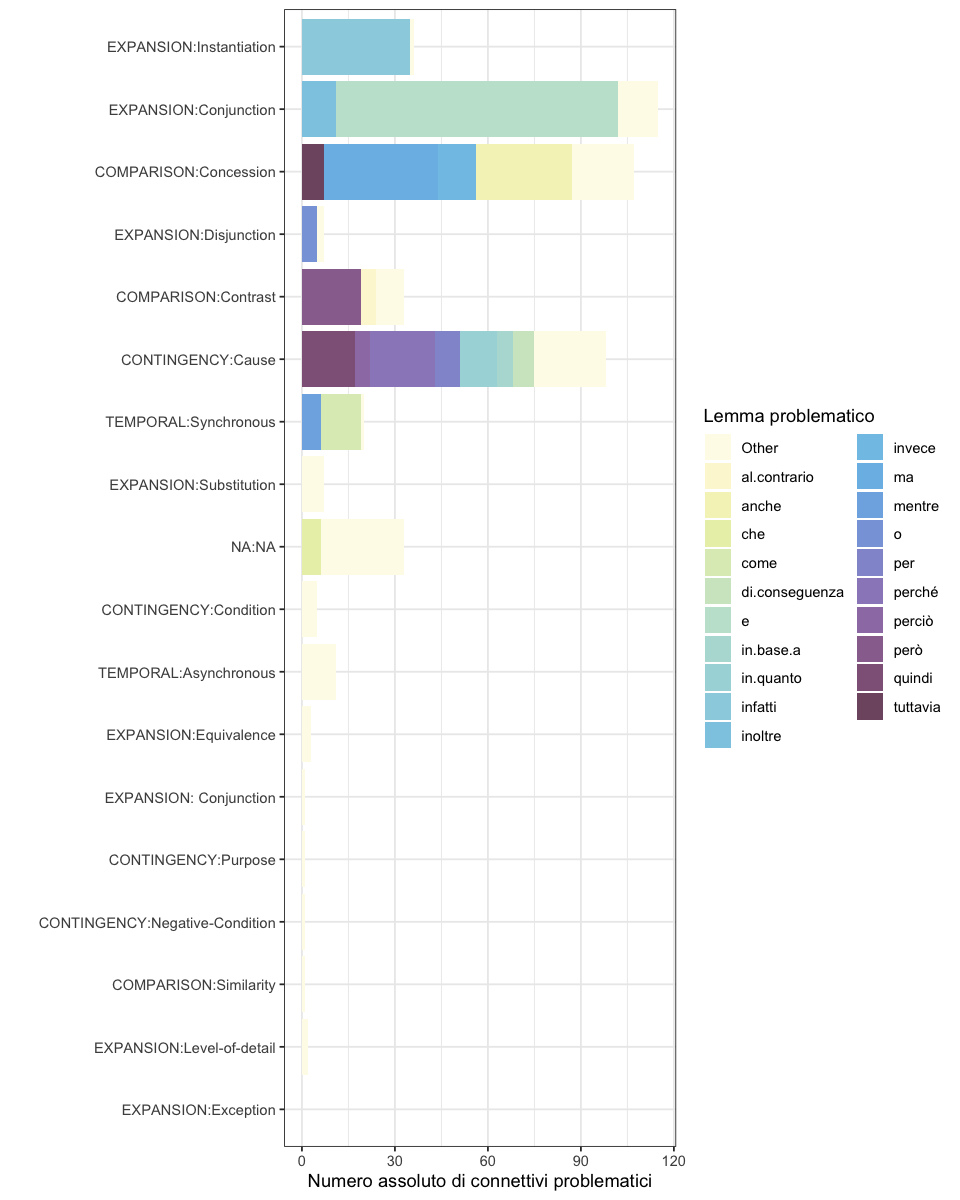

In [31]:
options(repr.plot.width = 8, repr.plot.height = 10)

sense_probl <- err_sense_df %>%
  mutate(lemma_grouped = if_else(lemma %in% top_lemmas, lemma, "Other")) %>%
  ggplot(aes(y = reorder(sense_cat, probl_sense),
             x = probl_sense,
             fill = lemma_grouped)) +
  geom_col() +
  ylab("") +
  xlab("Numero assoluto di connettivi problematici") +
  scale_fill_paletteer_d("khroma::iridescent",
                         name = "Lemma problematico") +
  theme_bw() +
  theme(legend.position = "right")

sense_probl

ggsave("figures/probl_sense_abs.png", sense_probl,
       device = "png", create.dir = TRUE,
       width = 7, height = 10, dpi = 600, bg = "transparent")


In [35]:
top_lemmas_acc_tab <- err_sense_df %>%
  filter(accuracy_sense > 0) %>%
  arrange(accuracy_sense) %>%
  filter(sense_cat %in% c("COMPARISON:Contrast",
                          "EXPANSION:Substitution",
                          "EXPANSION:Instantiation",
                          "COMPARISON:Similarity",
                          "CONTINGENCY:Purpose"))

top_lemmas_acc_tab %>%
  arrange(sense_cat)

#top_lemmas_acc <- top_lemmas_acc_tab %>%
#  pull(lemma)

#top_lemmas_acc

sense_cat,lemma,num_sense,probl_sense,accuracy_sense,coris_freq
<chr>,<chr>,<int>,<int>,<dbl>,<dbl>
COMPARISON:Contrast,dall.altra,3,1,0.6666667,3932.000
COMPARISON:Contrast,al.contrario,27,5,0.8148148,6869.000
COMPARISON:Contrast,dall.altra.parte,11,2,0.8181818,1917.000
COMPARISON:Contrast,da.una.parte,6,1,0.8333333,4699.000
COMPARISON:Contrast,bensì,14,2,0.8571429,5250.000
COMPARISON:Contrast,dall.altro,8,1,0.8750000,4930.000
COMPARISON:Contrast,da.un.lato,9,1,0.8888889,5407.000
COMPARISON:Contrast,dall.altro.lato,9,1,0.8888889,589.000
COMPARISON:Contrast,però,318,19,0.9402516,79016.000


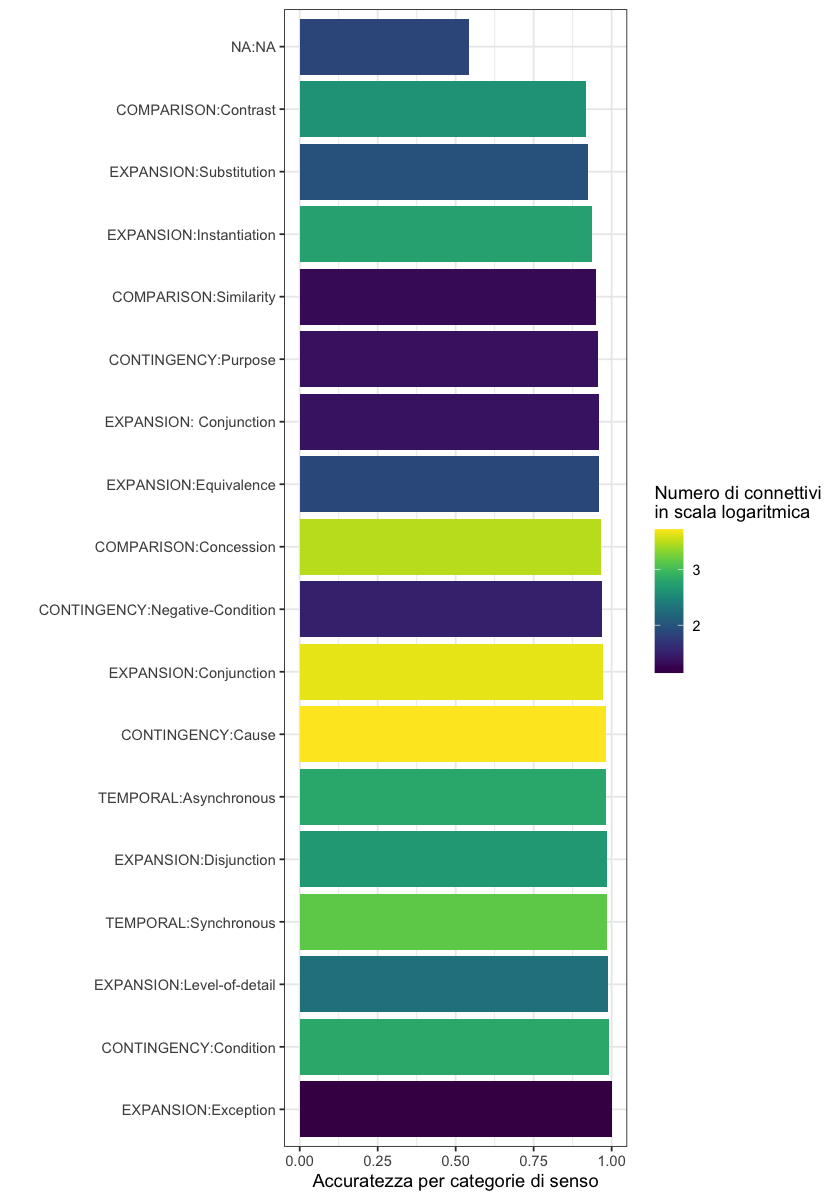

In [54]:
options(repr.plot.width = 7, repr.plot.height = 10)

sense_acc <- err_sense_df %>%
  ggplot(aes(y = reorder(sense_cat, -accuracy_sense),
             x = accuracy_sense,
             fill = log10(num_sense))) +
  geom_col() +
  ylab("") +
  xlab("Accuratezza per categorie di senso") +
  scale_fill_paletteer_c("viridis::viridis",
                          name = "Numero di connettivi\nin scala logaritmica") +
  theme_bw() +
  theme(legend.position = "right")

sense_acc

ggsave("figures/accuracy_sense_abs.png", sense_acc,
       device = "png", create.dir = TRUE,
       width = 7, height = 10, dpi = 600, bg = "transparent")